<a href="https://colab.research.google.com/github/samikshagadhave/binary_classification/blob/main/binary_classification_with_inception_model_on_transmission_dataset_with_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive

/content/gdrive


In [ ]:
import pandas as pd

df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
#print(Bad_dataset)

Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/train/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train/bad_dataset/"

img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/test/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/"
img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have bee

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128,128)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128,128)
)

print(train_ds)
print(validation_ds)


Found 198 files belonging to 2 classes.
Found 86 files belonging to 2 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers

model=Sequential()
model.add(InceptionV3(input_shape=(128,128,3),include_top=False,pooling='avg',weights='imagenet'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.add(Dropout(0.5))
model.layers[0].trainable=False
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_191 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dense_3 (Dense)             (None, 2048)              4196352   
                                                                 
 batch_normalization_192 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 dropout_3 (Dropout)         (None, 2048)             

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Metric
Metric=['accuracy','Precision','Recall']
model.compile(loss='BinaryCrossentropy',optimizer=Adam(learning_rate=0.001),metrics=Metric)

In [ ]:
history=model.fit(train_ds,validation_data=validation_ds,epochs=30)

Epoch 1/30
7/7 [==============================] - 28s 1s/step - loss: 7.2625 - accuracy: 0.4192 - precision: 0.9016 - recall: 0.3354 - val_loss: 11.4790 - val_accuracy: 0.2558 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
7/7 [==============================] - 21s 1s/step - loss: 7.1455 - accuracy: 0.4747 - precision: 0.9286 - recall: 0.3963 - val_loss: 11.4790 - val_accuracy: 0.2558 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
7/7 [==============================] - 21s 1s/step - loss: 7.3980 - accuracy: 0.4394 - precision: 0.9344 - recall: 0.3476 - val_loss: 11.4790 - val_accuracy: 0.2558 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
7/7 [==============================] - 21s 911ms/step - loss: 6.6546 - accuracy: 0.5051 - precision: 0.9583 - recall: 0.4207 - val_loss: 11.4790 - val_accuracy: 0.2558 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
7/7 [==============================] - 24s 2s/step - loss: 7.4033 - ac

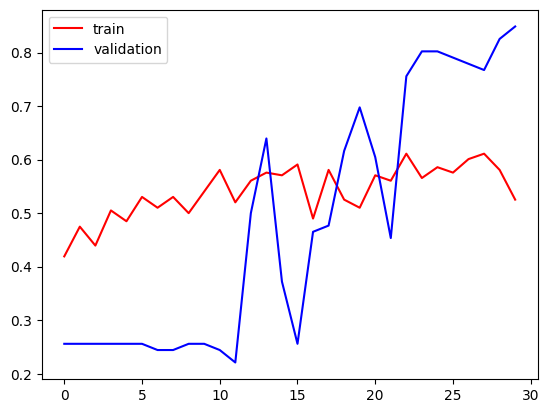

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

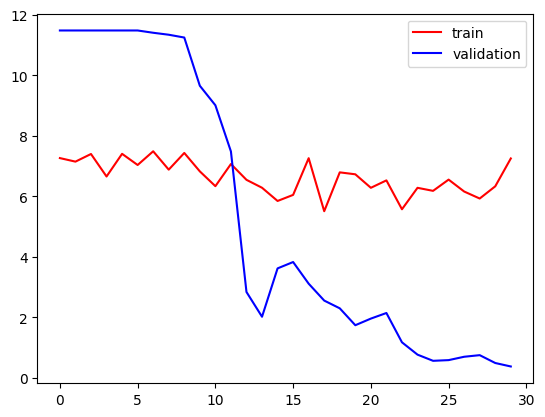

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0066.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 1s 1s/step
[[5.350227e-08]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD/Test/bad_dataset/DJI_0489.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)


1/1 [==============================] - 0s 27ms/step
[[0.9767808]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0108.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[2.3186832e-08]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0110.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[4.1796674e-10]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0491.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.91893697]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0493.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.8883201]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0495.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 40ms/step
[[0.96124154]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0497.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 41ms/step
[[0.90559894]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0499.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.6776151]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0501.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.8298572]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0503.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.6452112]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0505.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[0.98755836]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0507.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.0622013]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0509.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 35ms/step
[[0.5335247]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0608.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[1.5109693e-09]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0610.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 49ms/step
[[6.06603e-14]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0976.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.36349052]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0978.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.9708812]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0980.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[0.96544117]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0982.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.31655252]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0984.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.0020648]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0986.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[8.2865285e-05]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0869.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.92212033]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0871.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.5983995]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0873.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[0.9341339]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0875.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.893453]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0877.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.92362285]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0879.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.92395186]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0881.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.76839006]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0883.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[0.9971265]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0885.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.91131884]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0887.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.95514435]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0889.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.4470434]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0891.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 31ms/step
[[0.8415173]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0893.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.9433387]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0895.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.70881087]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0897.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.9097913]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0899.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.62355584]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0901.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.9953244]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0903.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[0.97529805]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0905.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.9914443]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0907.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.96677834]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0909.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.9908931]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0911.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 40ms/step
[[0.9541645]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0913.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.9775532]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0915.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.9574385]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0917.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 31ms/step
[[0.9265661]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0919.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.991621]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0921.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[0.99613154]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0923.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[0.99591124]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0925.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[0.9886756]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0927.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.96388465]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0929.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.9085347]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0931.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 41ms/step
[[0.79354227]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0933.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 35ms/step
[[0.9474495]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0935.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.68136376]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0937.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.96847624]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0939.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.85411686]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0941.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 37ms/step
[[0.9265464]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0943.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.9881391]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0945.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[0.89014393]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0947.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.96986234]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0949.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.9885515]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0951.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[0.98496675]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0953.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.99001604]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0955.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 44ms/step
[[0.95837617]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0957.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.91470087]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0959.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.97444963]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0961.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 39ms/step
[[0.94555634]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0963.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.9673884]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0965.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.97660416]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0967.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 31ms/step
[[0.9117475]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0969.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.61746365]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0971.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.3412497]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0973.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.6529738]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0975.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.83849126]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0977.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[0.5592985]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0981.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 38ms/step
[[0.6265156]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0983.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[0.7551952]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0985.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[0.35792086]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0987.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.9993117]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0989.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[0.8064315]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0991.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[0.88566995]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0993.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[0.9310487]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0995.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 47ms/step
[[0.905407]]


In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
truth=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
prediction=['bad','good','bad','bad','good','good','good','good','good','good','good','good','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good']
print(classification_report(truth,prediction))
print(confusion_matrix(truth,prediction))

              precision    recall  f1-score   support

         bad       0.40      0.27      0.32        22
        good       0.77      0.86      0.81        64

    accuracy                           0.71        86
   macro avg       0.59      0.57      0.57        86
weighted avg       0.68      0.71      0.69        86

[[ 6 16]
 [ 9 55]]
